In [1]:
# !pip install sktime


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sktime.forecasting.naive import NaiveForecaster
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Gasoline data
y = pd.Series([17,21,19,23,18,16,20,18,22,20,15,22])

# 1. Naive forecast 
naive_forecast = y.shift(1)

# 2. Average of all past values forecast (cumulative mean)
avg_forecast = y.expanding().mean().shift(1)

# Remove the first row (no forecast for week 1)
actual = y[1:]
naive_f = naive_forecast[1:]
avg_f = avg_forecast[1:]

print("Naive Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, naive_f))
print("MSE :", mean_squared_error(actual, naive_f))
print("MAPE:", mean_absolute_percentage_error(actual, naive_f))

print("\nAverage of Past Values Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, avg_f))
print("MSE :", mean_squared_error(actual, avg_f))
print("MAPE:", mean_absolute_percentage_error(actual, avg_f))

Naive Forecast Metrics:
MAE : 3.727272727272727
MSE : 16.272727272727273
MAPE: 0.1924431467337646

Average of Past Values Forecast Metrics:
MAE : 2.4372294372294374
MSE : 8.097324263038548
MAPE: 0.12848966799559686


# Ariline Passengers Data: 
- Monthly total number of airline passengers (in thousands) from January 1949 to December 1960.

In [4]:
data = sm.datasets.get_rdataset("AirPassengers").data
data = data.rename(columns={'value': 'passengers'})

In [5]:
data

,time,passengers
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121
...,...,...
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390


In [6]:
y = data['passengers']

# 1. Naive forecast 
naive_forecast = y.shift(1)

# 2. Average of all past values forecast (cumulative mean)
avg_forecast = y.expanding().mean().shift(1)

# Remove the first row (no forecast for week 1)
actual = y[1:]
naive_f = naive_forecast[1:]
avg_f = avg_forecast[1:]

print("Naive Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, naive_f))
print("MSE :", mean_squared_error(actual, naive_f))
print("MAPE:", mean_absolute_percentage_error(actual, naive_f))

print("\nAverage of Past Values Forecast Metrics:")
print("MAE :", mean_absolute_error(actual, avg_f))
print("MSE :", mean_squared_error(actual, avg_f))
print("MAPE:", mean_absolute_percentage_error(actual, avg_f))

Naive Forecast Metrics:
MAE : 25.86013986013986
MSE : 1136.3916083916083
MAPE: 0.09019447701311435

Average of Past Values Forecast Metrics:
MAE : 93.61143910845064
MSE : 14534.980309488683
MAPE: 0.2809710596717819


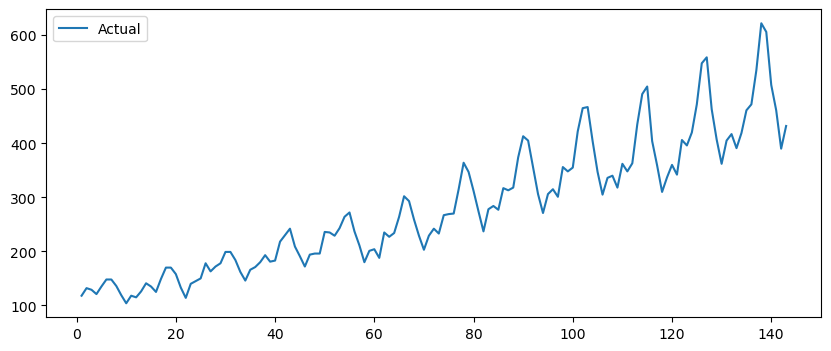

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(actual, label="Actual")
# plt.plot(naive_f, label="Naive Forecast")
# plt.plot(avg_f, label="Average Forecast")
# plt.title("Simple Average Forecasting - AirPassengers")
plt.legend()
plt.show()